# Analiza piłkarzy na podstawie danych z gry FIFA 24

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- Piotr Kula (*217302*)
- Kamil Marszałek (*217241*)

## Streszczenie
Poznanymi metodami statystycznymi uporządkowaliśmy piłkarzy występujących w grze **FIFA 24**. Dane pozyskaliśmy z dostępnej bazy danych w serwisie [Kaggle](https://www.kaggle.com/datasets/rehandl23/fifa-24-player-stats-dataset?resource=download) udostępnionych na licencji Apache 2.0. Naszym celem jest wyłonienie najlepszych piłkarzy na podstawie ich statystyk.

## Słowa kluczowe
- **TOPSIS** - metoda wielokryterialnej analizy decyzyjnej, która służy do wyboru najlepszego wariantu spośród zestawu alternatyw
- **SSW** - oznacza "Sum of Squares Within" (Suma Kwadratów Wewnątrzgrupowych), jest jednym z komponentów analizy wariancji (ANOVA), która służy do analizy różnic między średnimi kilku grup danych
- **Metoda Hellwiga** - metoda, która pomaga w identyfikacji podobieństwa między obserwacjami. Opiera się na minimalizacji wariancji wewnątrz klastra oraz maksymalizacji wariancji między klastrami. Hellwig zaproponował tę metodę, aby skutecznie zgrupować dane o różnym poziomie zmienności.
- **Metoda Strahl'a** - koncentruje się na maksymalizacji różnic między klastrami poprzez minimalizację sumy kwadratów odległości wewnątrz klastra. Strahl zaproponował tę technikę, aby skutecznie oddzielić klastry o różnych charakterystykach.
- **Metoda Nowaka** - znana również jako metoda najmniejszych kwadratów (Least Squares Method), jest używana w analizie regresji. Polega ona na minimalizacji sumy kwadratów różnic między wartościami obserwowanymi a wartościami przewidywanymi przez model regresji. Metoda ta jest często wykorzystywana do dopasowania funkcji matematycznej do zestawu danych, co umożliwia prognozowanie wartości na podstawie innych zmiennych.
- **Metoda Muza** - znana także jako metoda optymalizacji wielokryterialnej, jest używana do wyboru najlepszego rozwiązania spośród wielu możliwych wariantów. Opiera się na analizie wielu kryteriów jednocześnie i poszukiwaniu rozwiązania, które najlepiej spełnia wszystkie kryteria jednocześnie. Metoda ta jest szczególnie przydatna w sytuacjach, gdzie istnieje wiele konkurujących ze sobą celów lub ograniczeń.

## Wprowadzenie

W świecie sportu analiza danych staje się coraz bardziej powszechną praktyką, która pozwalaja zarówno zawodnikom, jak i zespołom trenerskim na podejmowanie bardziej świadomych decyzji. W ramach niniejszego badania, skupiliśmy się na analizie piłkarzy występujących w grze FIFA 24.

### Przedmiot badania
Przedmiotem badania są piłkarze z całego świata, którzy występują w grze FIFA 24.


### Cel i zakres badania 
Celem naszego badania jest porównanie piłkarzy z różnych krajów oraz klubów. Postawiliśmy sobie za cel uporządkowanie ich od najlepszego do najgorszego stosując sześć metod statystycznych.


## Import odpowiednich bibliotek oraz przegląd danych

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from scipy.stats import spearmanr
from io import BytesIO
from plotly.offline import iplot, plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
seed = 2024

## Zmienne wybrane do analizy

Z dostępnych danych zostały wybrane jedynie te, które zostały uznane za znaczące a niektóre z nich, takie jak *ball_uncontrol* powstały z ich odpowiadających cech w celu uzyskania destymulanty.
Age_destimulant powstało z odjęcia 'najbardziej optymalnego' wieku dla piłkarza od jego aktualnego wieku. 

In [2]:
features = {
    "cecha": ["dribbling", "reactions", "interceptions", "vision", "stamina", "strength", "balance", "sprint_speed", "agility", "ball_uncontrol", "instability", "age_destimulant"],
    "opis": ["Umiejętności piłkarza w dryblingu", "Czas reakcji piłkarza", "Umiejętność piłkarza w przechwytywaniu podań", "Zdolność przeglądu pola gry piłkarza na boisku", "Poziom wytrzymałości piłkarza", "Poziom siły piłkarza", "Balans piłkarza podczas gry", "Prędkość piłkarza podczas sprintów", "Poziom zwinności piłkarza", "Poziom braku kontroli nad piłką piłkarza", "Poziom niestabilności podczas gry", "Różnica wieku piłkarza od optymalnego wieku 28 lat"],
    "rodzaj cechy": ["stymulanta", "stymulanta", "stymulanta", "stymulanta", "stymulanta", "stymulanta", "stymulanta", "stymulanta", "stymulanta", "destymulanta", "destymulanta", "destymulanta"]
}

df = pd.DataFrame({
    "Cecha": features["cecha"],
    "Opis": features["opis"],
    "Rodzaj cechy": features["rodzaj cechy"]
})

excel_file = BytesIO()

with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    df.to_excel(writer, index=False)

excel_file.seek(0)

df_from_memory = pd.read_excel(excel_file)

pd.set_option('display.max_colwidth', None)

df_from_memory

,Cecha,Opis,Rodzaj cechy
0,dribbling,Umiejętności piłkarza w dryblingu,stymulanta
1,reactions,Czas reakcji piłkarza,stymulanta
2,interceptions,Umiejętność piłkarza w przechwytywaniu podań,stymulanta
3,vision,Zdolność przeglądu pola gry piłkarza na boisku,stymulanta
4,stamina,Poziom wytrzymałości piłkarza,stymulanta
5,strength,Poziom siły piłkarza,stymulanta
6,balance,Balans piłkarza podczas gry,stymulanta
7,sprint_speed,Prędkość piłkarza podczas sprintów,stymulanta
8,agility,Poziom zwinności piłkarza,stymulanta
9,ball_uncontrol,Poziom braku kontroli nad piłką piłkarza,destymulanta


In [3]:
data = pd.read_excel('FIFA_MAD_dane.xlsx')
data.head()

,player,country,height,age,club,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,Cristian Castro Devenish,Colombia,192,22,Atl. Nacional,43,68,65,30,55,86,40,52,43,45,50,6
1,Silaldo Taffarel,Brazil,181,31,Corinthians,70,70,70,64,87,81,42,67,65,31,46,3
2,Thomas Dähne,Germany,193,29,Holstein Kiel,12,65,20,49,38,68,41,48,36,75,52,1
3,Michael Sollbauer,Austria,187,33,SK Rapid Wien,48,64,66,29,73,82,56,63,57,54,30,5
4,Diego Segovia,Uruguay,191,23,Independiente,8,50,12,38,28,64,24,31,34,86,66,5


## Wstępna analiza danych

In [4]:
values = pd.read_excel('FIFA_MAD_dane.xlsx', sheet_name='wartosci')
values.head(9)

,,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,Średnia,56.12,61.95,47.39,54.46,63.37,65.38,64.06,64.95,63.77,41.10,41.39,4.23
1,Odchylenie standardowe,18.76,8.88,20.45,13.70,16.10,12.62,14.49,15.11,14.85,16.56,12.01,2.70
2,Mediana,62.00,62.00,54.00,56.00,66.00,66.00,66.00,68.00,66.00,37.00,40.00,4.00
3,Kwartyl 25%,51.00,56.00,28.00,45.00,56.00,58.00,56.00,57.00,56.00,31.00,33.00,2.00
4,Kwatyl 50%,62.00,62.00,54.00,56.00,66.00,66.00,66.00,68.00,66.00,37.00,40.00,4.00
5,Kwatyl 75%,68.00,68.00,64.00,65.00,74.00,74.00,74.00,75.00,74.00,45.00,48.00,6.00
6,Minimum,5.00,32.00,3.00,10.00,14.00,25.00,20.00,13.00,21.00,6.00,4.00,0.00
7,Maksimum,95.00,93.00,89.00,94.00,95.00,96.00,95.00,97.00,93.00,92.00,87.00,13.00
8,Skośność,-1.22,-0.09,-0.41,-0.34,-0.95,-0.42,-0.64,-0.94,-0.67,1.40,0.50,0.37


## Wykresy pudełkowe

Poniżej przedstawiono graficzny rozkład posiadanych przez nas cech statystycznych. W przypadku niektórych z nich, takich jak driblling można zauważyć dużą część wartości odstających, które pokazują jak zróżnicowane są dane. Nie świadczą one o błędach pomiarowych.

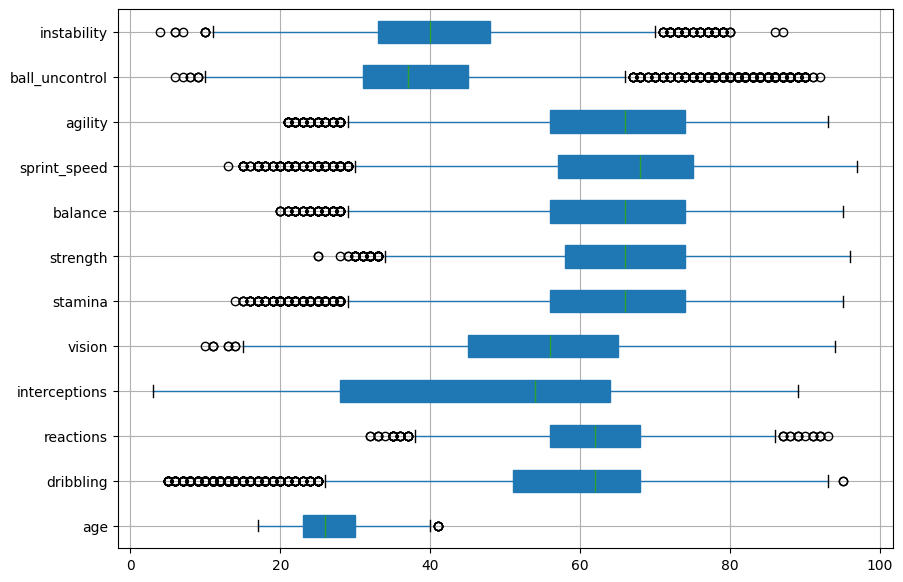

In [5]:
df = pd.DataFrame(data)
plt.figure(figsize=(10, 7))
df.boxplot(["age", "dribbling", "reactions", "interceptions", "vision", "stamina", "strength", "balance", "sprint_speed", "agility", "ball_uncontrol", "instability"], patch_artist=True, vert= False)
plt.show()

## Kraje z których pochodzą piłkarze

Histogram z krajami z których pochodzą piłkarze z naszej bazy danych pokazuje, że najwięcej z nich jest kolejno z Anglii, Niemiec oraz Hiszpanii.

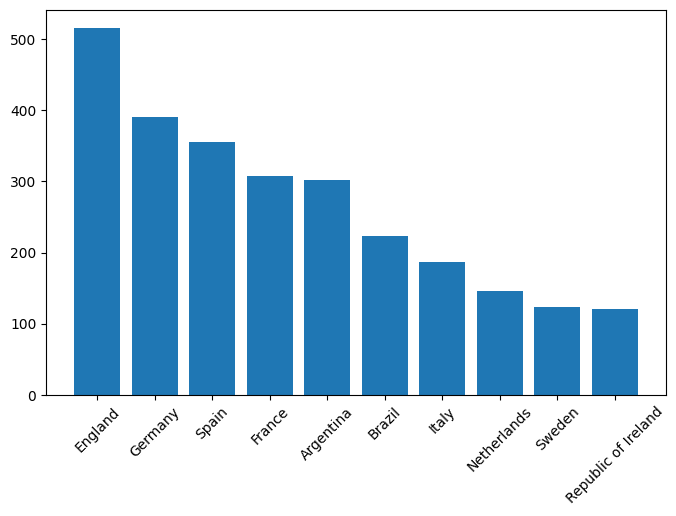

In [6]:
df = pd.DataFrame(data)
country_counts = df['country'].value_counts()
top_10_countries = country_counts.head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_10_countries.index, top_10_countries)
plt.xticks(rotation=45)
plt.show()

## Usuwanie duplikatów

In [7]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 3


W naszej bazie danych znaleźliśmy 3 duplikaty, które należy usunąć. Skorzystamy w tym celu z funkcji *drop_duplicates*, która nam to umożliwi.

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 0


Po wykonaniu odpowiedniego polecenia, usunięto zduplikowane dane.

# Przegląd literatury

Z prestiżowych rankingów takich jak **Football Manager 2024** wynika, że najlepszymi piłkarzami okazali się tacy zawodnicy jak *Kevin De Bruyne*, *Erling Haaland* oraz *Kylian Mbappé*. Z kolei ranking **Ballon d'Or 2023** wytyczył trójkę takich najlepszych piłkarzy jak *Lionel Messi*, *Erling Haaland* i *Kylian Mbappé*. Poniżej przedstawiono oba wcześniej cytowane rankingi.

In [10]:
ranking_data = [("Kevin De Bruyne", "Manchester City", 190), ("Erling Haaland", "Manchester City", 188), ("Kylian Mbappé", "Paris Saint-Germain", 188), ("Lionel Messi", "Inter Miami", 185), 
        ("Harry Kane", "Bayern Monachium", 183), ("Robert Lewandowski", "FC Barcelona", 182), ("Vinícius Júnior", "Real Madryt", 181), ("Thibaut Courtois", "Real Madryt", 181),
        ("Ederson", "Manchester City", 180), ("Mohamed Salah", "Liverpool", 180), ("Bernardo Silva", "Manchester City", 178), ("Rodri", "Manchester City", 177), 
        ("Virgil van Dijk", "Liverpool", 177), ("Alisson", "Liverpool", 176), ("Joshua Kimmich", "Bayern Monachium", 176), ("Marc-André ter Stegen", "FC Barcelona", 175), 
        ("Neymar", "Al-Hilal", 175), ("Luka Modrić", "Real Madryt", 174), ("Rúben Dias", "Manchester City", 174), ("Bukayo Saka", "Arsenal", 173)]

df = pd.DataFrame(ranking_data, columns=["Imię i nazwisko piłkarza", "Zespół", "Ocena"])
df["Miejsce"] = df.reset_index().index + 1
df = df[["Miejsce", "Imię i nazwisko piłkarza", "Zespół", "Ocena"]]
df_styled = df.style.set_caption("<h2>Ranking Football Manager 2024</h2>")
display(df_styled)

,Miejsce,Imię i nazwisko piłkarza,Zespół,Ocena
0,1,Kevin De Bruyne,Manchester City,190
1,2,Erling Haaland,Manchester City,188
2,3,Kylian Mbappé,Paris Saint-Germain,188
3,4,Lionel Messi,Inter Miami,185
4,5,Harry Kane,Bayern Monachium,183
5,6,Robert Lewandowski,FC Barcelona,182
6,7,Vinícius Júnior,Real Madryt,181
7,8,Thibaut Courtois,Real Madryt,181
8,9,Ederson,Manchester City,180
9,10,Mohamed Salah,Liverpool,180


In [11]:
ranking_data = [ ("Lionel Messi", "Inter Miami", 462), ("Erling Haaland", "Manchester City", 357), ("Kylian Mbappé", "Paris Saint-Germain", 270), ("Kevin De Bruyne", "Manchester City", 100),
        ("Rodri", "Manchester City", 57), ("Vinícius Júnior", "Real Madrid", 49), ("Julián Álvarez", "Manchester City", 28), ("Victor Osimhen", "Napoli", 24),
        ("Bernardo Silva", "Manchester City", 20), ("Luka Modrić", "Real Madrid", 19), ("Mohamed Salah", "Liverpool", 13), ("Robert Lewandowski", "Barcelona", 12), 
        ("Yassine Bounou", "Sevilla", 10), ("İlkay Gündoğan", "Barcelona", 8), ("Emiliano Martínez", "Aston Villa", 7), ("Karim Benzema", "Al-Ittihad", 6),
        ("Khvicha Kvaratskhelia", "Napoli", 6), ("Jude Bellingham", "Real Madrid", 5), ("Harry Kane", "Tottenham Hotspur", 4), ("Lautaro Martínez", "Inter Milan", 4)]

df = pd.DataFrame(ranking_data, columns=["Imię i nazwisko piłkarza", "Zespół", "Ocena"])
df["Miejsce"] = df.reset_index().index + 1
df = df[["Miejsce", "Imię i nazwisko piłkarza", "Zespół", "Ocena"]]
df_styled = df.style.set_caption("<h2>Ranking Ballon d'Or 2023</h2>")
display(df_styled)

,Miejsce,Imię i nazwisko piłkarza,Zespół,Ocena
0,1,Lionel Messi,Inter Miami,462
1,2,Erling Haaland,Manchester City,357
2,3,Kylian Mbappé,Paris Saint-Germain,270
3,4,Kevin De Bruyne,Manchester City,100
4,5,Rodri,Manchester City,57
5,6,Vinícius Júnior,Real Madrid,49
6,7,Julián Álvarez,Manchester City,28
7,8,Victor Osimhen,Napoli,24
8,9,Bernardo Silva,Manchester City,20
9,10,Luka Modrić,Real Madrid,19


# Wykorzystanie różnych metod do porządkowania liniowego

Metody, które będziemy wykorzystywali do naszej analizy pochodzą z artykułu *O wyborze metody porządkowania liniowego do oceny 
gospodarki odpadami w Polsce w ujęciu przestrzennym* autorstwa Karola Kukuły i Lidii Luty. Wybranymi przez nas metodami porządkowania są kolejno: Hellwig, TOPSIS, SSW, STRAHL, MUZ, NOWAK.

## Metoda PCA
### 1. Standaryzacja danych do użycia w analizie składowych głównych (PCA)

In [12]:
data_with_numbers = data.drop(['player', 'country', 'club', 'age', 'height'], axis=1)
scaler = StandardScaler()
df = scaler.fit_transform(data_with_numbers)
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

### 2. Interpretacja wyników: które cechy mają największy wpływ na róznice między piłkarzami
Wykorzystywana jest analiza współczynników ładunku głównych składowych PC. Wartości te określają jak bardzo każda cecha przyczynia się do każdej głównej składowej.
- Wartości bliskie zeru wskazują na to, że dana cecha ma mały wpływ na dany komponent główny.
- Dodatnie wartości wskazują na pozytywną korelację między daną cechą a danym komponentem głównym, podczas gdy ujemne wartości wskazują na negatywną korelację.
- Im większa wartość bezwzględna, tym większy wpływ ma dana cecha na dany komponent główny.

In [13]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=data_with_numbers.columns)
loadings_df

,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,-0.374920,-0.231818,-0.204296,-0.311189,-0.332336,-0.044966,-0.299182,-0.307938,-0.332522,0.377914,0.327541,0.098196
1,0.103497,-0.359459,-0.307785,0.032472,-0.139749,-0.601420,0.353718,0.206164,0.299723,0.000454,0.214726,0.281948
2,0.006987,0.462500,-0.506141,0.469580,-0.358284,-0.158777,-0.089330,-0.253765,-0.024144,0.018259,-0.287147,0.006155


### 3. Wnioski
- pierwsza główna składowa (indeks 0): największy wpływ na tę składową mają zmienne <b>dribbling, vision, stamina, balance, sprint_speed, agility</b>. Wszystkie te zmienne mają ujemne ładunki, co oznacza, że im wyższa jest wartość tych zmiennych, tym niższa jest wartość tej głównej składowej. Zmienne <b>ball_uncontrol i instability</b> mają dodatni ładunek, co oznacza, że im wyższa jest wartość tych zmiennych, tym wyższa jest wartość tej głównej składowej.
- druga główna składowa (indeks 1) : zmienne ujemne o największym wpływie: <b>reactions, interceptions, strength</b> zmienne dodatnie: <b>balance, agility</b>
- trzecia główna składowa (indeks 2): ujemne zmienne: <b>interceptions, stamina</b> dodatnie zmienne: <b>reactions, vision</b>
#### Cechy takie jak reactions, interceptions, instability najbardziej wpływają na różnice między piłkarzami.

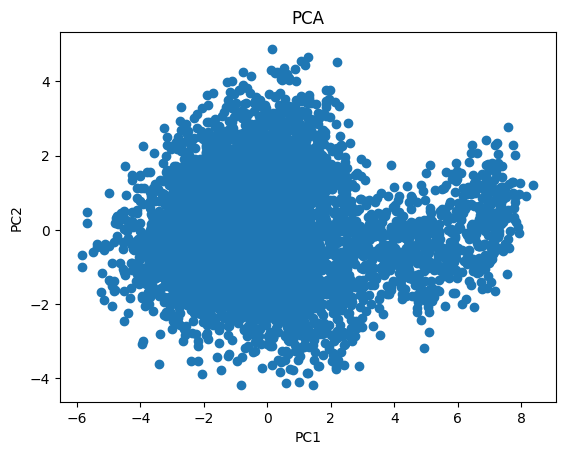

In [14]:
pca_data = pca.transform(df)
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

# Metoda TOPSIS

Metoda TOPSIS (ang. Technique for Order Preference by Similarity to Ideal Solution) jest wielokryterialną metodą analizy decyzyjnej, służącą do porządkowania i wyboru wariantów decyzyjnych w oparciu o zestaw kryteriów.

### 1. Obliczenia

Na początek wyznaczamy znormalizowaną macierz decyzyjną: $R = (r_{ij}) $

$$ r_{ij} = \frac{x_{ij}}{\sqrt{\sum_{k=1}^m x_{kj}^2}} $$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$r_{ij}$ - znormalizowana wartość obserwacji

In [15]:
df = pd.DataFrame(data.drop(['player', 'country', 'club', 'age', 'height'], axis=1))
col_sq_sum = np.sqrt((df ** 2).sum())
topsis_normalised_matrix = df.divide(col_sq_sum)

Liczymy wagi

In [16]:
# wagi cech przypisano subiektywnie na podstawie metody PCA
preferences = {
    'dribbling': 5,
    'reactions': 5,
    'interceptions': 2,
    'vision': 5,
    'stamina': 4,
    'strength': 4,
    'balance': 5,
    'sprint_speed': 4,
    'agility': 5,
    'ball_uncontrol': 5,
    'instability': 2,
    'age_destimulant': 2,
}

total_preference = sum(preferences.values())
normalized_preferences = {feature: weight/total_preference for feature, weight in preferences.items()}

normalised_weights = pd.DataFrame(normalized_preferences, index=[0])

print("Znormalizowane wagi:")
normalised_weights

Znormalizowane wagi:


,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,0.104167,0.104167,0.041667,0.104167,0.083333,0.083333,0.104167,0.083333,0.104167,0.104167,0.041667,0.041667


Następnie wyznaczamy ważoną znormalizowaną macierz decyzyjną $ V = (v_{ij}) $

$$ v_{ij} = r_{ij} \cdot w_j $$
$w_j$ - waga cechy

In [17]:
df_result = topsis_normalised_matrix.mul(normalised_weights['dribbling'][0], axis=0)

for column in topsis_normalised_matrix.columns:
    df_result[column] = topsis_normalised_matrix[column] * normalised_weights[column][0]


Wyznaczamy idealne $A^+ $ i nieidealne $A^-$ rozwiązanie

$$ A^+ = (v_1^+,v_2^+,\ldots,v_n^+) = \{(\max_i v_{ij}~|~j\in B)\}, \{(\min_i v_{ij}~|~j\in C)\} $$ $$
A^- = (v_1^-,v_2^-,\ldots,v_n^-) = \{(\min_i v_{ij}~|~j\in B)\}, \{(\max_i v_{ij}~|~j\in C)\}
$$

In [18]:
ideal_solution = np.max(df_result, axis=0)
ideal_solution['ball_uncontrol'] = np.min(df_result['ball_uncontrol'])
ideal_solution['instability'] = np.min(df_result['instability'])
ideal_solution['age_destimulant'] = np.min(df_result['age_destimulant'])

non_ideal_solution = np.min(df_result, axis=0)
non_ideal_solution['ball_uncontrol'] = np.max(df_result['ball_uncontrol'])
non_ideal_solution['instability'] = np.max(df_result['instability'])
non_ideal_solution['age_destimulant'] = np.max(df_result['age_destimulant'])

Obliczamy odległości od idealnego oraz nieidealnego rozwiązania

odległości każdego wariantu decyzyjnego $A_i$ od rozwiązania
idealnego$A^+$ $$
d_i^+ = \sqrt{\sum_{j=1}^n (v_{ij} - v_j^+)^2} $$oraz antyidealnego $A^-$  $$
d_i^- = \sqrt{\sum_{j=1}^n (v_{ij} - v_j^-)^2}
$$

In [19]:
distance_to_ideal = np.sqrt(np.sum((df_result - ideal_solution) ** 2, axis=1))
distance_to_non_ideal = np.sqrt(np.sum((df_result - non_ideal_solution) ** 2, axis=1))

Obliczenie wyniku TOPSIS

Wyznaczenie współczynnika względnej bliskości wariantów decyzyjnych$A_i$ 
do rozwiązania idealnego $A^+$
$$
RC_i = \frac{d_i^-}{d_i^++d_i^-}
$$

Ranking wariantów decyzyjnych względem wartości współczynnika
względnej bliskości wariantów decyzyjnych do rozwiązania idealnego –$~RC_i$. Im
wyższa wartość tego współczynnika tym lepszy wariant decyzyjny. Najlepszym wariantem jest ten z najwyższą wartości$~RC_i$. 

In [20]:
topsis_score = distance_to_non_ideal / (distance_to_ideal + distance_to_non_ideal)

### 2. Prezentowanie danych

In [21]:
data['TOPSIS Score'] = topsis_score
sorted_data = data.sort_values(by='TOPSIS Score', ascending=False)
selected_columns = sorted_data[['player', 'TOPSIS Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'TOPSIS Score': 'Wynik metodą TOPSIS'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą TOPSIS
0,1,Mohamed Salah,0.870836
1,2,Kylian Mbappé,0.850951
2,3,Ángel Correa,0.850286
3,4,Lautaro Martínez,0.848274
4,5,Renato Sanches,0.846653
5,6,Sergi Darder,0.843841
6,7,João Cancelo,0.842876
7,8,Sadio Mané,0.842718
8,9,Kevin De Bruyne,0.839945
9,10,Joshua Kimmich,0.835453


## 3. Wnioski

Metoda TOPSIS jest skutecznym narzędziem do tworzenia rankingu piłkarzy, ponieważ umożliwia uwzględnienie wielu różnorodnych cech, przypisanie im wag oraz stabilną ocenę odporną na wartości odstające. Jej zdolność do stosunkowej oceny piłkarzy względem innych graczy sprawia, że może być użyteczna w identyfikowaniu najlepszych zawodników oraz ocenie ich umiejętności w kontekście konkretnej sytuacji lub potrzeb zespołu. 
## 4. Prezentowanie wykresów

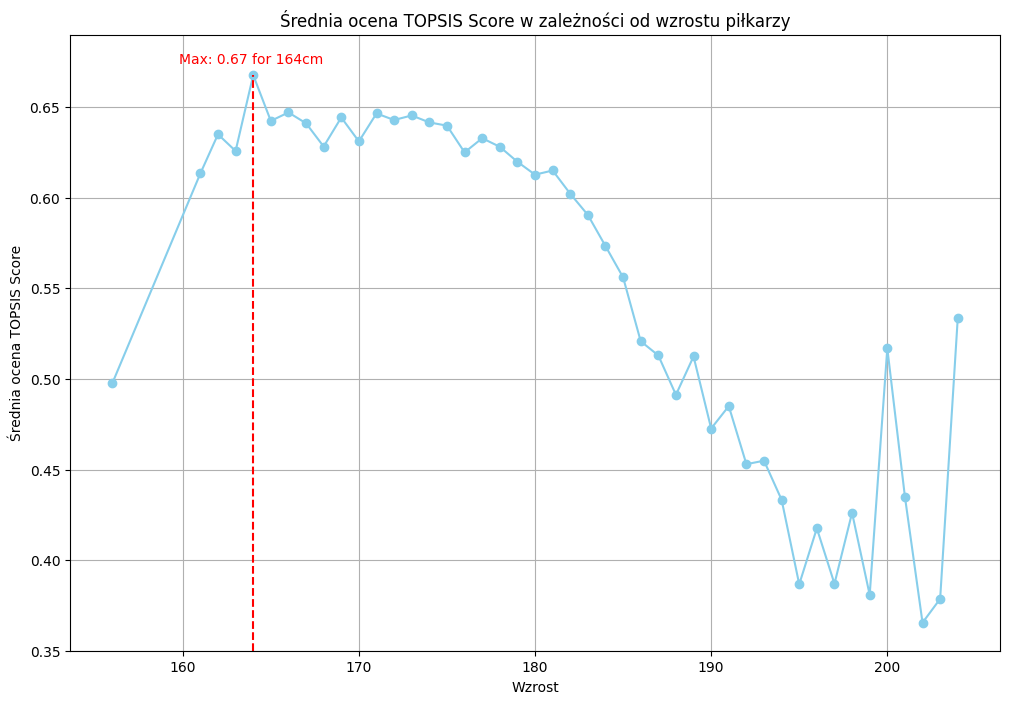

In [22]:
average_scores_by_height = sorted_data.groupby('height')['TOPSIS Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=0.35, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.005, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score w zależności od wzrostu piłkarzy')
plt.ylim(0.35, 0.69)
plt.grid(True)
plt.show()

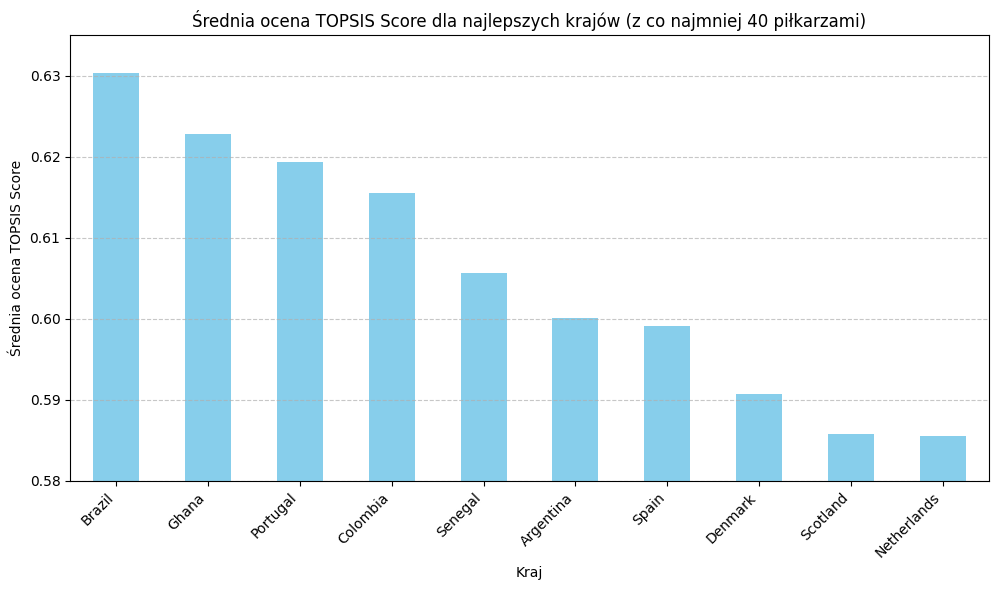

In [23]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['TOPSIS Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.58, 0.635)

plt.show()

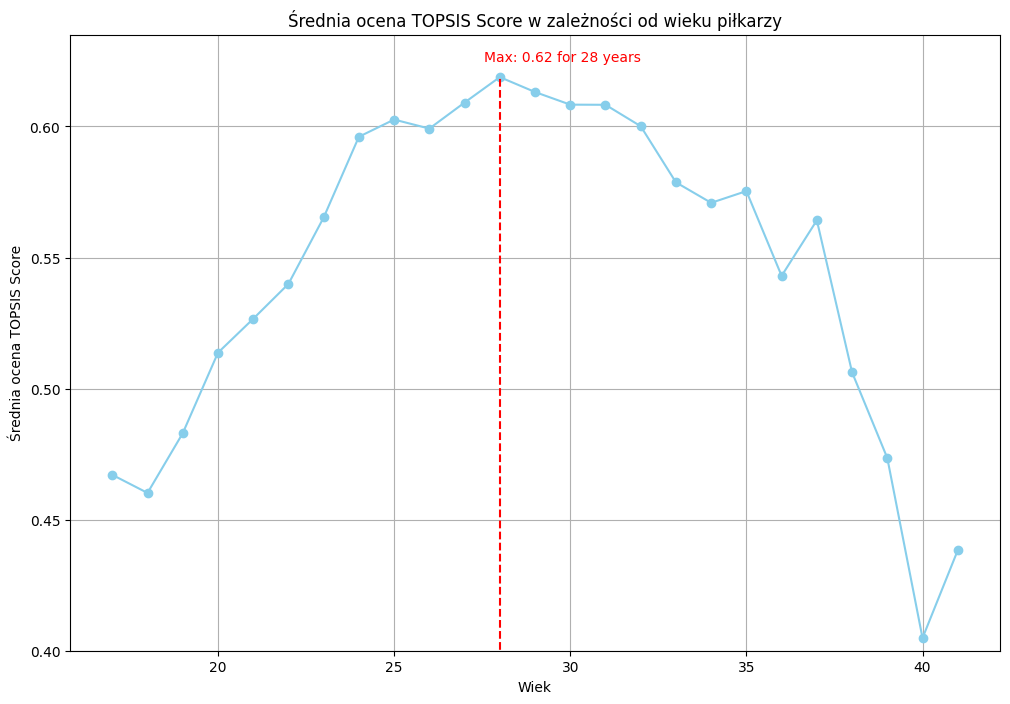

In [24]:
average_scores_by_age = sorted_data.groupby('age')['TOPSIS Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=0.35, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+4, max_score+0.005, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(0.4, 0.635)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda SSW

**Metoda statystyczna SSW**, czyli *Suma kwadratów odchyleń wewnątrzgrupowych*, jest miarą zmienności w obrębie poszczególnych grup w zbiorze danych. SSW jest wykorzystywana w analizie wariancji (ANOVA) do oceny, czy istnieją statystycznie istotne różnice między średnimi wartościami różnych grup.

### 1. Wzory
$$
z_{i j}=\frac{x_{i j}-\bar{x}_j}{S_j}
$$
$$
Q_{i} = \frac{1}{m} \sum_{j=1}^{m} z_{ij}
$$
$x_i$ - obserwacja j-tej zmiennej obiektu <br>
$x_j$ - średnia arytmetyczna j-tej grupy <br>
$S_j$ - odchylenie standardowe j-tej cechy <br>
$Q_{i}$ - wartość cechy syntetycznej dla i-tego obiektu

**Interpretacja**:<br>
- *Mała wartość SSW*: Oznacza to, że dane w obrębie grup są homogeniczne, czyli mało zróżnicowane. Innymi słowy, obserwacje w danej grupie są zbliżone do siebie pod względem wartości cechy, którą badamy.
- *Duża wartość SSW*\: Oznacza to, że dane w obrębie grup są heterogeniczne, czyli zróżnicowane. Innymi słowy, obserwacje w danej grupie różnią się między sobą pod względem wartości cechy, którą badamy.

### 2. Obliczenia

In [25]:
SSW = []
for i in range(len(data_with_numbers)):
    ssw = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i] -  values.loc[0, column_name]) / values.loc[1, column_name]
            else:
                Zij = (data_with_numbers[column_name].iloc[i] -  values.loc[0, column_name]) / values.loc[1, column_name]
            ssw += Zij
    SSW.append(ssw / len(data_with_numbers.columns))
data['SSW Score'] = SSW

### 3. Prezentowanie wyników

In [26]:
sorted_data = data.sort_values(by='SSW Score', ascending=False)
selected_columns = sorted_data[['player', 'SSW Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'SSW Score': 'Wynik metodą SSW'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą SSW
0,1,Mohamed Salah,1.648039
1,2,Kylian Mbappé,1.593753
2,3,Joshua Kimmich,1.520200
3,4,Renato Sanches,1.485625
4,5,Lautaro Martínez,1.478768
5,6,Marco Verratti,1.475607
6,7,João Cancelo,1.468507
7,8,Kevin De Bruyne,1.467923
8,9,Sadio Mané,1.467406
9,10,Federico Valverde,1.457528


### 4. Wnioski
Jest to metoda z dużą wrażliwością na wartości odstające, których w naszych danych jest sporo. Metoda SSW nie uwzględnia wag zmiennych. Oznacza to, że wszystkie zmienne są traktowane jako równie ważne, co nie zawsze jest zgodne z rzeczywistością.<br>Nieprawdą byłoby stwierdzenie, że umiejętność przeglądu pola (vision) ma taką samą wagę jak prędkość piłkarza podczas sprintów (sprint_speed).
### 5. Prezentowanie Wykresów

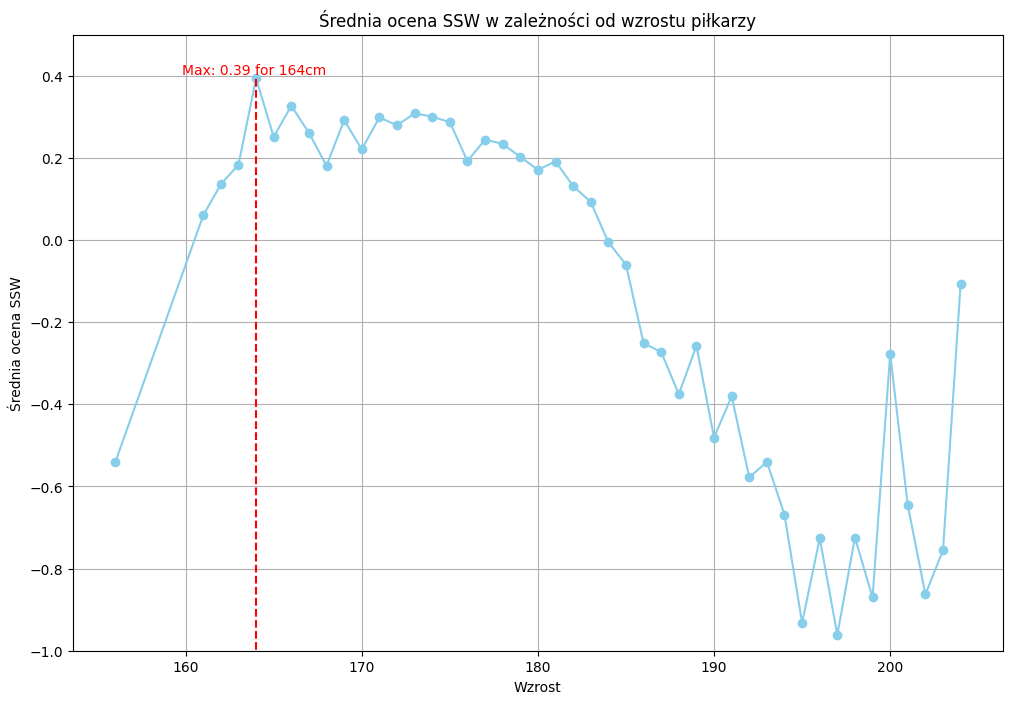

In [27]:
average_scores_by_height = sorted_data.groupby('height')['SSW Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.0025, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW w zależności od wzrostu piłkarzy')
plt.ylim(-1, 0.5)
plt.grid(True)
plt.show()

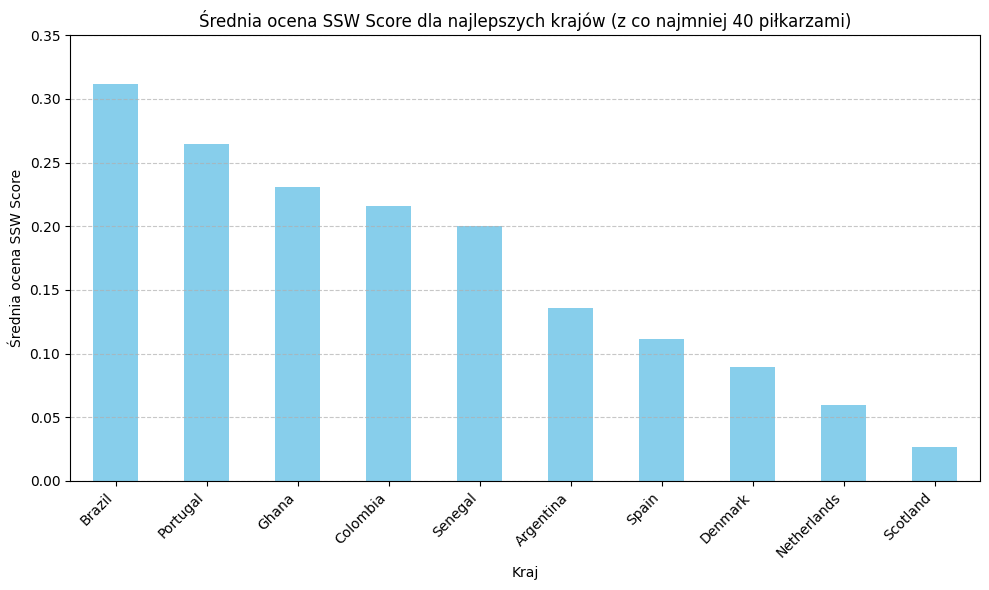

In [28]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['SSW Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena SSW Score')
plt.title('Średnia ocena SSW Score dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0, 0.35)

plt.show()

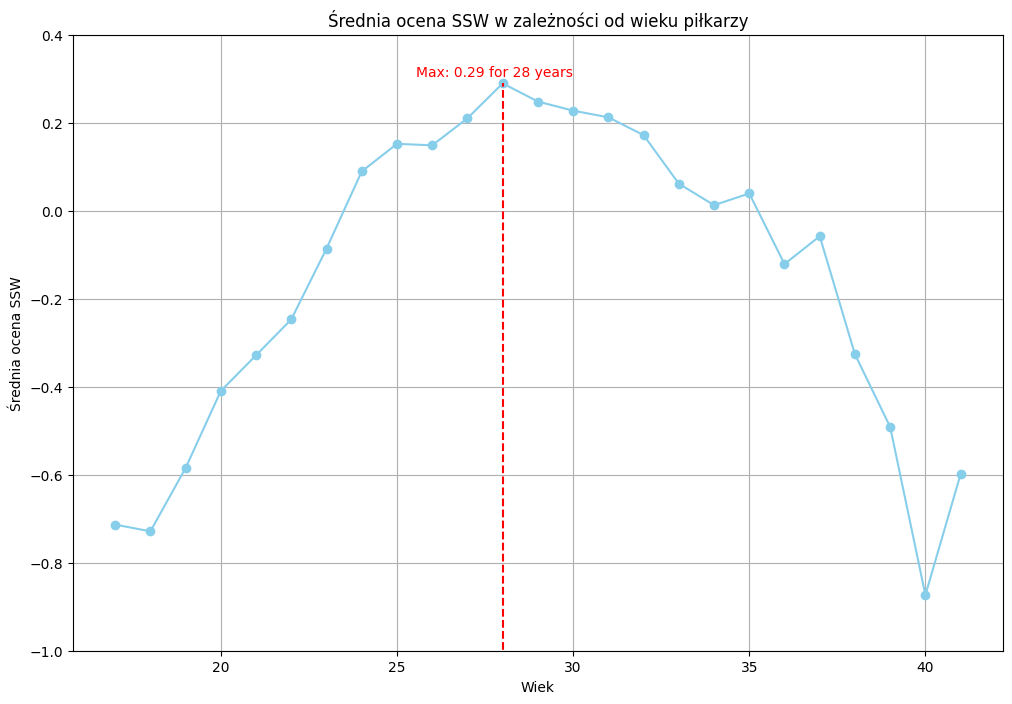

In [29]:
average_scores_by_age = data.groupby('age')['SSW Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.009, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(-1, 0.4)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda Hellwiga

Metoda porządkowania liniowego Hellwiga jest metodą wzorcową, zaproponowaną przez Jörga Hellwiga w 1968r., w której punktem odniesienia obiektów w przestrzeni wielowymiarowej jest wzorzec.

### 1. Normalizacja zmiennych <br>
$$
z_{ij}=\frac{x_{ij}-\bar x_j}{s_j}
$$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$\bar {x_j}$ - średnia arytmetyczna obserwacji j-tej zmiennej obiektu <br>
$s_j$ - średnia arytmetyczna j-tej cechy

In [30]:
df = pd.DataFrame(data.drop(['player', 'country', 'club', 'age', 'height', 'TOPSIS Score', 'SSW Score'], axis=1))
col_mean = df.sum()/df.count()
col_std = df.std()

hellwig_standardized_matrix = (df.subtract(col_mean)).divide(col_std)

### 2. Współrzędne wzorca

$$z_{0j}=\left\{\begin{array}{lc}
\max_i\{z_{ij}\}&\mbox{ - dla zmiennych stymulant}\\
\min_i\{z_{ij}\}&\mbox{ - dla zmiennych destymulant}
\end{array} \right.$$

In [31]:
ideal_solution = np.max(hellwig_standardized_matrix, axis=0)
ideal_solution['ball_uncontrol'] = np.min(hellwig_standardized_matrix['ball_uncontrol'])
ideal_solution['instability'] = np.min(hellwig_standardized_matrix['instability'])
ideal_solution['age_destimulant'] = np.min(hellwig_standardized_matrix['age_destimulant'])

### 3. Odległość obiektów od wzorca

$$
d_{i0} = \sqrt{\sum_{j=1}^m\left (z_{ij}-z_{0j}\right )^2}
$$

In [32]:
distance = np.sqrt(np.sum((hellwig_standardized_matrix - ideal_solution) ** 2, axis=1))

### 4. Wartość zmiennej agregowanej

$$
q_i = 1-\frac{d_{i0}}{d_0}
$$<br>
$$d_0 = \bar{d_0} + 2s_d$$
$$\bar{d_0} = \frac{1}{n} \sum_{i=1}^n d_{i0}$$
$$s_d = \sqrt{\sum_{i=1}^n (d_{i0}-\bar{d_0})^2}$$

In [33]:
d_zero_bar = np.sum(distance)/distance.count()
s_d = np.sqrt(np.sum((distance - d_zero_bar) ** 2))
d_zero = d_zero_bar + (2*s_d)

hellwig_results = 1 - distance.divide(d_zero)
data['Hellwig Score'] = hellwig_results

### 5. Prezentowanie wyników

In [34]:
sorted_data = data.sort_values(by='Hellwig Score', ascending=False)
selected_columns = sorted_data[['player', 'Hellwig Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'Hellwig Score': 'Wynik metodą Hellwiga'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Hellwiga
0,1,Mohamed Salah,0.992007
1,2,Renato Sanches,0.991487
2,3,Lautaro Martínez,0.990775
3,4,Sergi Darder,0.990731
4,5,Federico Valverde,0.990730
5,6,Emre Can,0.990297
6,7,Franck Yannick Kessié,0.990280
7,8,Kevin De Bruyne,0.990128
8,9,Canales,0.989954
9,10,Kylian Mbappé,0.989938


### 6. Prezentowanie wykresów

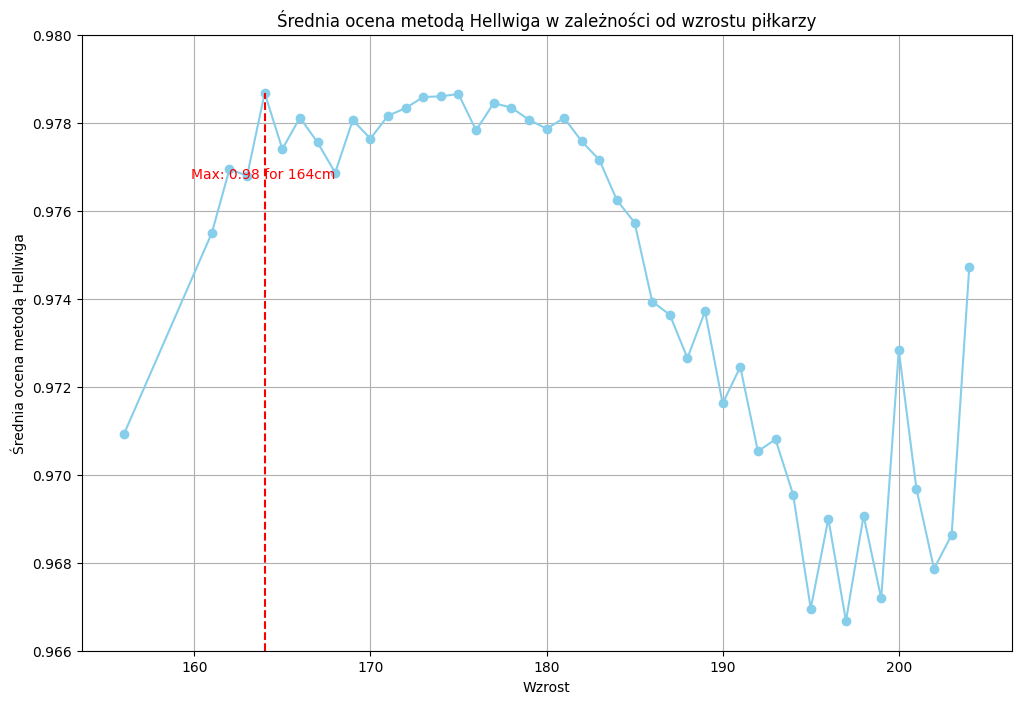

In [35]:
average_scores_by_height = sorted_data.groupby('height')['Hellwig Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena metodą Hellwiga')
plt.title('Średnia ocena metodą Hellwiga w zależności od wzrostu piłkarzy')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=0.966, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score-0.002, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.ylim(0.966, 0.98)
plt.grid(True)
plt.show()

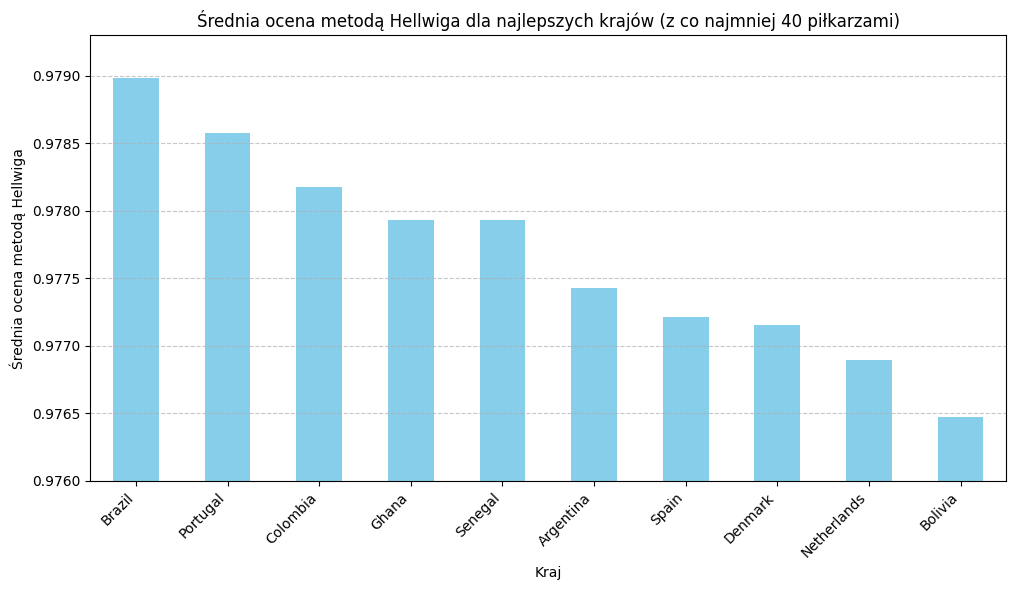

In [36]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['Hellwig Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena metodą Hellwiga')
plt.title('Średnia ocena metodą Hellwiga dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.976, 0.9793)

plt.show()

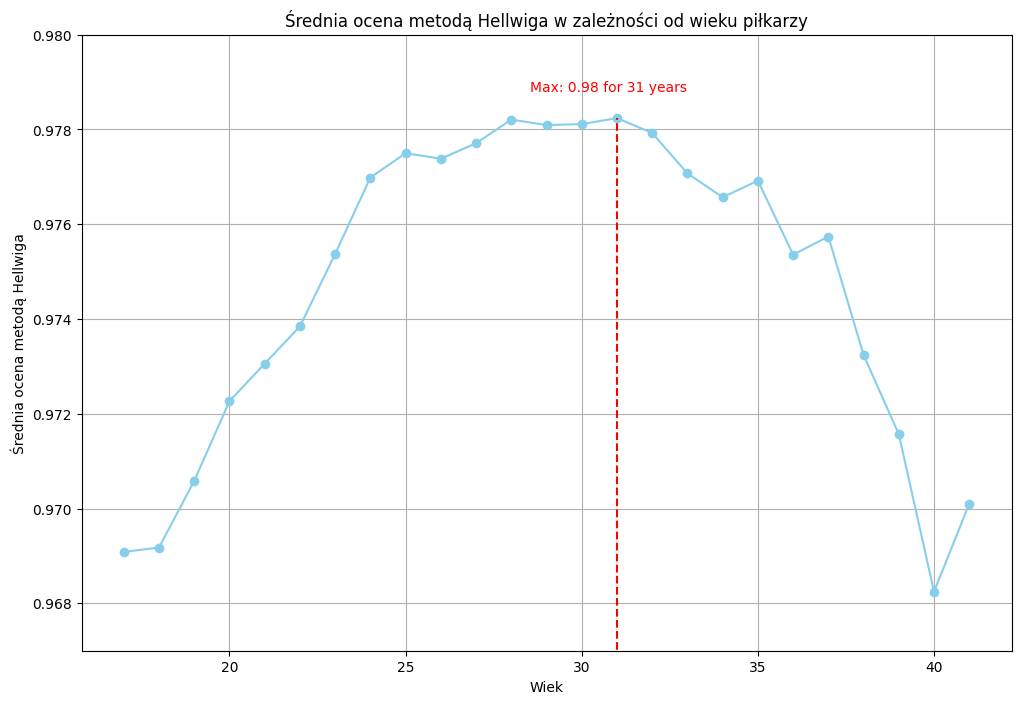

In [37]:
average_scores_by_age = data.groupby('age')['Hellwig Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.0005, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(0.967, 0.98)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena metodą Hellwiga')
plt.title('Średnia ocena metodą Hellwiga w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

## Metoda Strahl'a

### 1. Wzory

$$
z_{ij}=\frac{x_{ij}}{\max_{i} x_{ij}}
$$
$$
Q_{i} = \frac{1}{m} \sum_{j=1}^{m} z_{ij}
$$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$\max_{i} x_{ij}$ - maksymalna wartość j-tej cechy statystycznej <br>
$Q_{i}$ - wartość cechy syntetycznej dla i-tego obiektu

### 2. Obliczenia

In [38]:
STRAHL = []
for i in range(len(data_with_numbers)):
    strahl = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i]) / values.loc[7, column_name]
            else:
                Zij = data_with_numbers[column_name].iloc[i] / values.loc[7, column_name]
            strahl += Zij
            
    STRAHL.append(strahl / len(data_with_numbers.columns))
data['STRAHL Score'] = STRAHL

### 3. Prezentowanie wyników

In [39]:
sorted_data = data.sort_values(by='STRAHL Score', ascending=False)
selected_columns = sorted_data[['player', 'STRAHL Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'STRAHL Score': 'Wynik metodą Strahl\'a'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Strahl'a
0,1,Mohamed Salah,0.622428
1,2,Joshua Kimmich,0.619754
2,3,Marco Verratti,0.612664
3,4,João Cancelo,0.612587
4,5,Renato Sanches,0.609711
5,6,Kylian Mbappé,0.608794
6,7,Sergi Darder,0.605965
7,8,Federico Valverde,0.602714
8,9,Ángel Correa,0.600907
9,10,Franck Yannick Kessié,0.598759


### 4. Wnioski
Metoda Strahla pomaga nam zrozumieć, jak rozmieszczone są punkty w przestrzeni. Dzięki niej możemy dostrzec wzorce, takie jak skupiska czy kierunki rozkładu. Jest to przydatne narzędzie, które pomaga nam lepiej zrozumieć badane obszary i zjawiska.

### 5. Wyświetlanie wykresów

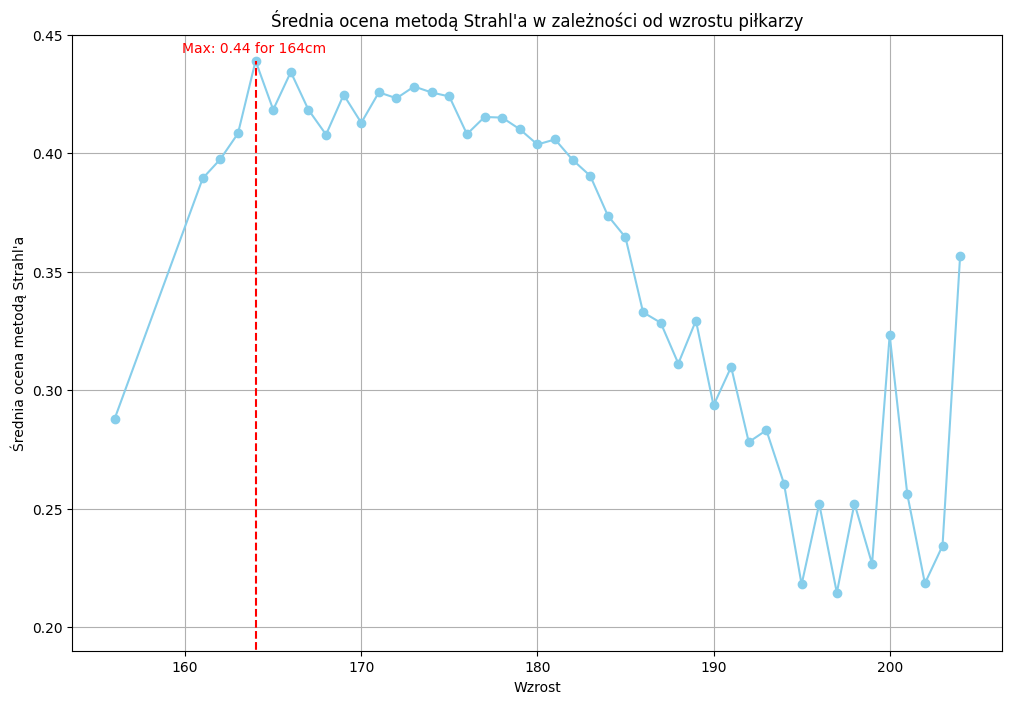

In [40]:
average_scores_by_height = sorted_data.groupby('height')['STRAHL Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.0025, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena metodą Strahl\'a')
plt.title('Średnia ocena metodą Strahl\'a w zależności od wzrostu piłkarzy')
plt.ylim(0.19, 0.45)
plt.grid(True)
plt.show()

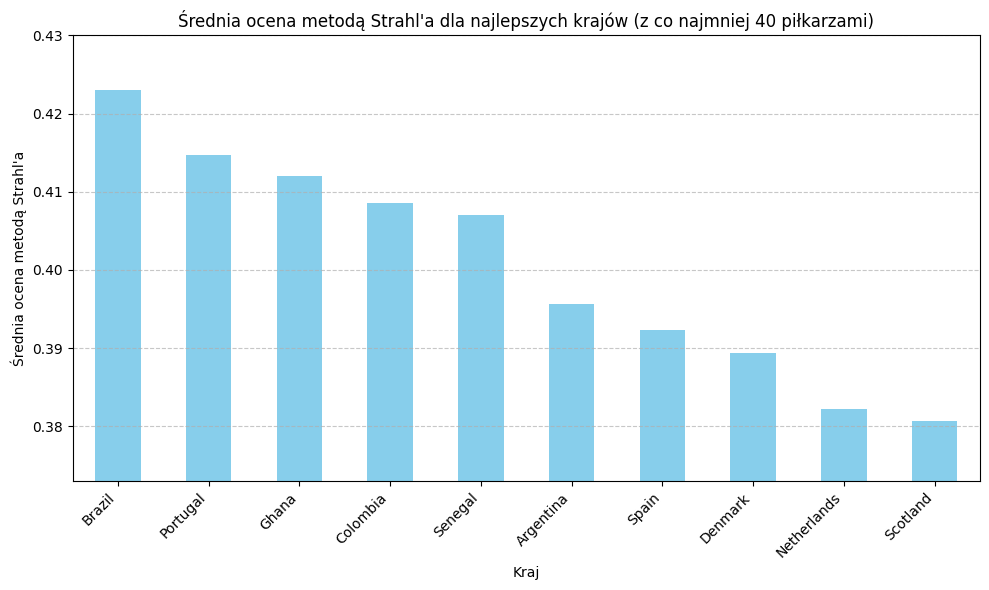

In [41]:
players_count_by_country = sorted_data['country'].value_counts()
top_countries = players_count_by_country[players_count_by_country >= 40].index
average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['STRAHL Score'].mean()
top_countries = average_scores_by_country.nlargest(10).index
top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena metodą Strahl\'a')
plt.title('Średnia ocena metodą Strahl\'a dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.373, 0.43)

plt.show()

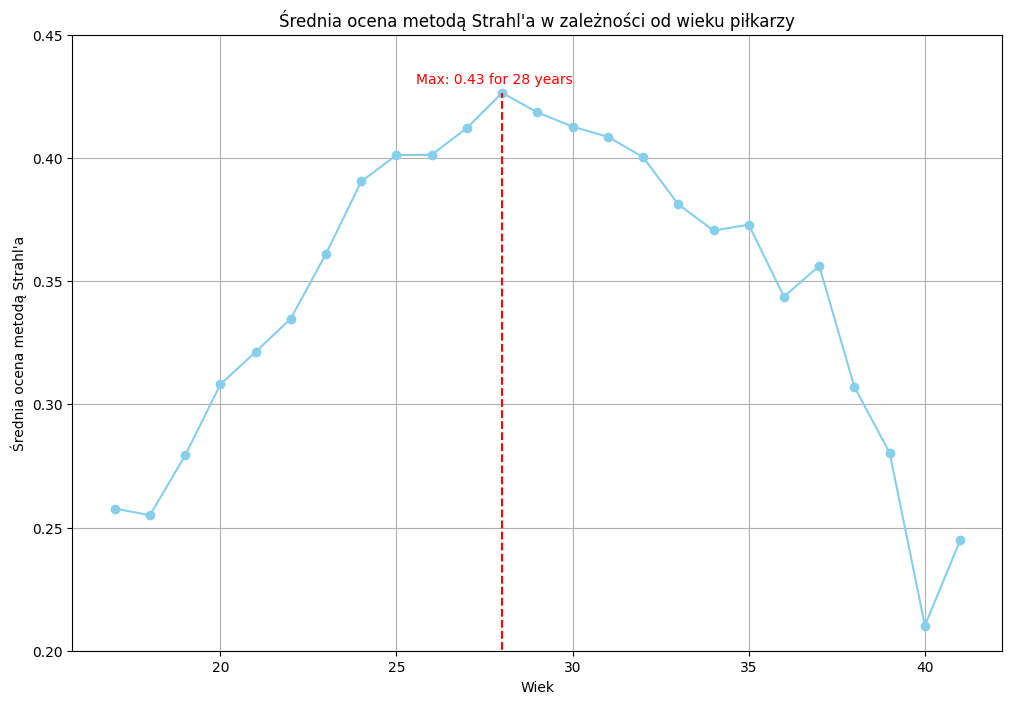

In [42]:
average_scores_by_age = data.groupby('age')['STRAHL Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.0025, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(0.2, 0.45)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena metodą Strahl\'a')
plt.title('Średnia ocena metodą Strahl\'a w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

## Metoda Muz'a

### 1. Wzory

$$
z_{ij}=\frac{x_{ij}-\min_{i} x_{ij}}{\max_{i} x_{ij}-\min_{i} x_{ij}}
$$
$$
Q_{i} = \frac{1}{m} \sum_{j=1}^{m} z_{ij}
$$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$\min_{i} x_{ij}$ - minimalna wartość j-tej cechy statystycznej <br>
$\max_{i} x_{ij}$ - maksymalna wartość j-tej cechy statystycznej <br>
$Q_{i}$ - wartość cechy syntetycznej dla i-tego obiektu

### 2. Obliczenia

In [43]:
MUZ = []
for i in range(len(data_with_numbers)):
    muz = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i] - values.loc[6, column_name]) / (values.loc[7, column_name]-values.loc[6, column_name])
            else:
                Zij = (data_with_numbers[column_name].iloc[i] - values.loc[6, column_name]) / (values.loc[7, column_name]-values.loc[6, column_name])
            muz += Zij
            
    MUZ.append(muz / len(data_with_numbers.columns))
data['MUZ Score'] = MUZ

### 3. Prezentowanie wyników

In [44]:
sorted_data = data.sort_values(by='MUZ Score', ascending=False)
selected_columns = sorted_data[['player', 'MUZ Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'MUZ Score': 'Wynik metodą Muz\'a'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Muz'a
0,1,Mohamed Salah,0.617564
1,2,Joshua Kimmich,0.605325
2,3,Kylian Mbappé,0.603977
3,4,Renato Sanches,0.597916
4,5,Marco Verratti,0.595059
5,6,João Cancelo,0.594548
6,7,Federico Valverde,0.588745
7,8,Sergi Darder,0.588615
8,9,Ángel Correa,0.587477
9,10,Lautaro Martínez,0.586063


### 4. Wnioski 
Metoda statystyczna Muz stanowi skuteczne narzędzie do analizy zależności między zmiennymi, co pozwala lepiej zrozumieć badane zjawiska.
Jej zastosowanie umożliwia dokładną ocenę siły oraz istotności tych związków, co jest kluczowe dla podejmowania trafnych decyzji opartych na danych.

### 5. Wyświetlanie wykresów

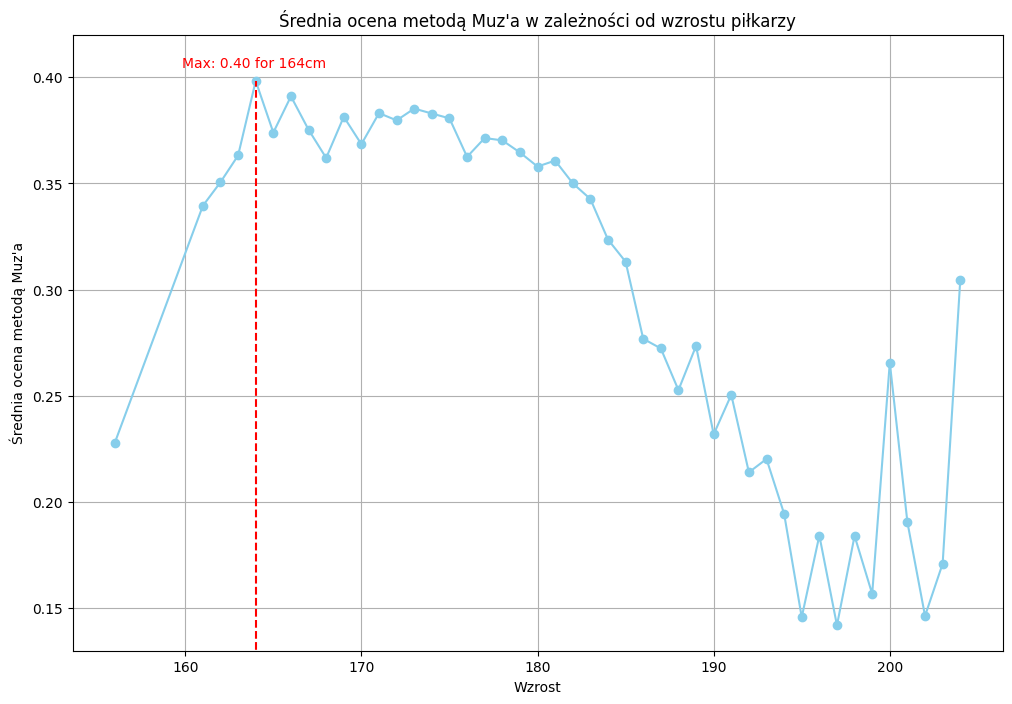

In [45]:
average_scores_by_height = sorted_data.groupby('height')['MUZ Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.005, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena metodą Muz\'a')
plt.title('Średnia ocena metodą Muz\'a w zależności od wzrostu piłkarzy')
plt.ylim(0.13, 0.42)
plt.grid(True)
plt.show()

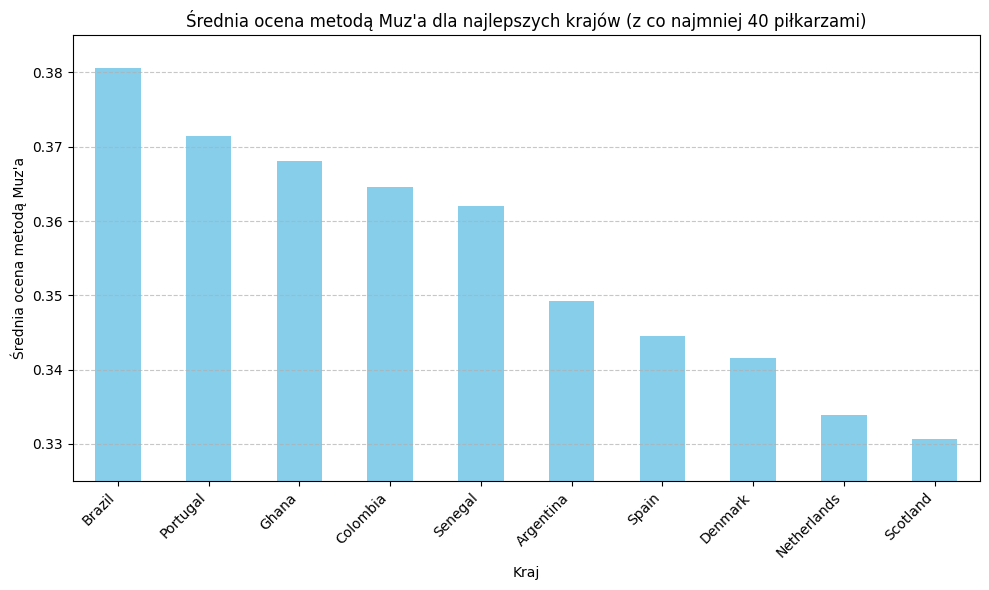

In [46]:
players_count_by_country = sorted_data['country'].value_counts()
top_countries = players_count_by_country[players_count_by_country >= 40].index
average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['MUZ Score'].mean()
top_countries = average_scores_by_country.nlargest(10).index
top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena metodą Muz\'a')
plt.title('Średnia ocena metodą Muz\'a dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.325, 0.385)

plt.show()

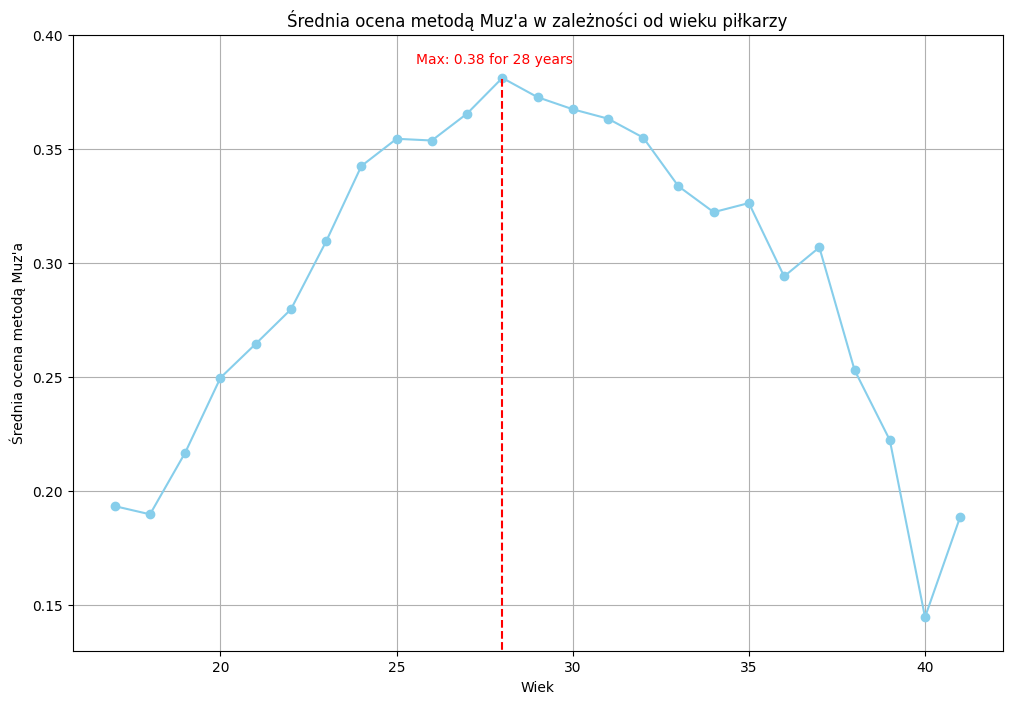

In [47]:
average_scores_by_age = data.groupby('age')['MUZ Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.005, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(0.13, 0.4)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena metodą Muz\'a')
plt.title('Średnia ocena metodą Muz\'a w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda Nowaka

**Metoda statystyczna Nowaka**, nazywana także analizą czestotliwości występowania kombinacji, jest techniką używaną do identyfikacji wzorców w danych. Polega na analizie częstości występowania różnych kombinacji zmiennych w zbiorze danych w celu wykrycia istotnych zależności między nimi. Jest szczególnie przydatna w badaniach społecznych i marketingowych do odkrywania ukrytych wzorców zachowań konsumentów czy struktur społecznych.
### 1. Wzory

$$
Q_{i} = \frac{1}{m} \sum_{j=1}^{m} z_{ij}
$$
$$
z_{ij} = \frac{x_{ij}}{\bar{x}_{j}}
$$


$\bar{x}_j$ - średnia arytmetyczna j-tej grupy <br>
$z_{ij}$ - unormowana j-tej cechy dla i-tego obiektu <br>
$Q_i$ - wartość cechy syntetycznej dla i-tego obiektu
### 2. Obliczenia

In [48]:
nowaklist = []
for i in range(len(data_with_numbers)):
    Qi = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i]) / values.loc[0, column_name]
            else:
                Zij = (data_with_numbers[column_name].iloc[i]) / values.loc[0, column_name]
            Qi += Zij
            
    nowaklist.append(Qi / len(data_with_numbers.columns))

In [49]:
data['Nowak Score'] = nowaklist

### 3. Prezentowanie wyników

In [50]:
sorted_data = data.sort_values(by='Nowak Score', ascending=False)
selected_columns = sorted_data[['player', 'Nowak Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'Nowak Score': 'Wynik metodą Nowaka'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Nowaka
0,1,Joshua Kimmich,0.965367
1,2,Marco Verratti,0.947207
2,3,João Cancelo,0.944596
3,4,Mohamed Salah,0.932206
4,5,Sergi Darder,0.930767
5,6,Ángel Correa,0.921703
6,7,Renato Sanches,0.920933
7,8,Bruno Fernandes,0.920177
8,9,Andrew Robertson,0.919279
9,10,Emre Can,0.910659


### 4. Wnioski
**Metoda statystyczna Nowaka**, podobnie jak metoda SSW, służy do oceny danych, w tym przypadku piłkarzy.

W porównaniu z **metodą TOPSIS**, **metoda Nowaka** prezentuje się korzystniej.

**Metoda** ta charakteryzuje się dużą wrażliwością na wartości odstające, które są obecne w naszych danych w znacznym stopniu. Nie uwzględnia ona wag zmiennych, co oznacza, że wszystkie czynniki są traktowane jednakowo, co nie zawsze jest zgodne z rzeczywistością. Na przykład, umiejętność przeglądu pola (vision) nie zawsze ma taką samą wagę jak prędkość piłkarza podczas sprintów (sprint_speed).

Warto zauważyć, że analiza danych za pomocą **metody Nowaka** może dostarczyć użytecznych wniosków, ale należy zachować ostrożność w interpretacji wyników.
### 5. Wyświetlanie wykresów

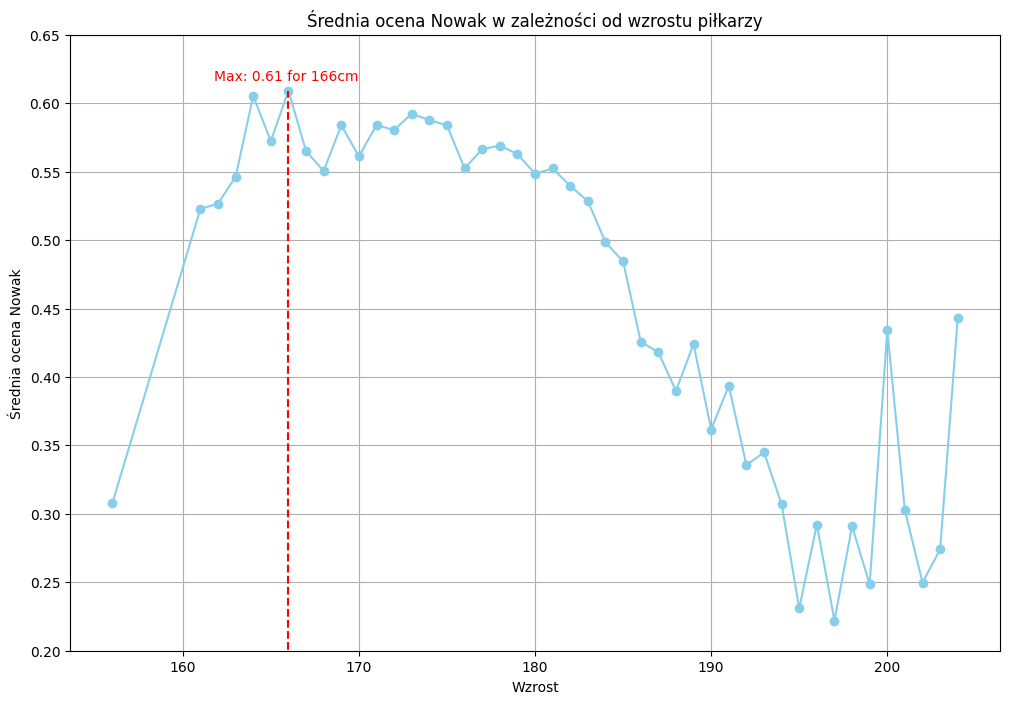

In [51]:
average_scores_by_height = sorted_data.groupby('height')['Nowak Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.005, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena Nowak')
plt.title('Średnia ocena Nowak w zależności od wzrostu piłkarzy')
plt.ylim(0.2, 0.65)
plt.grid(True)
plt.show()

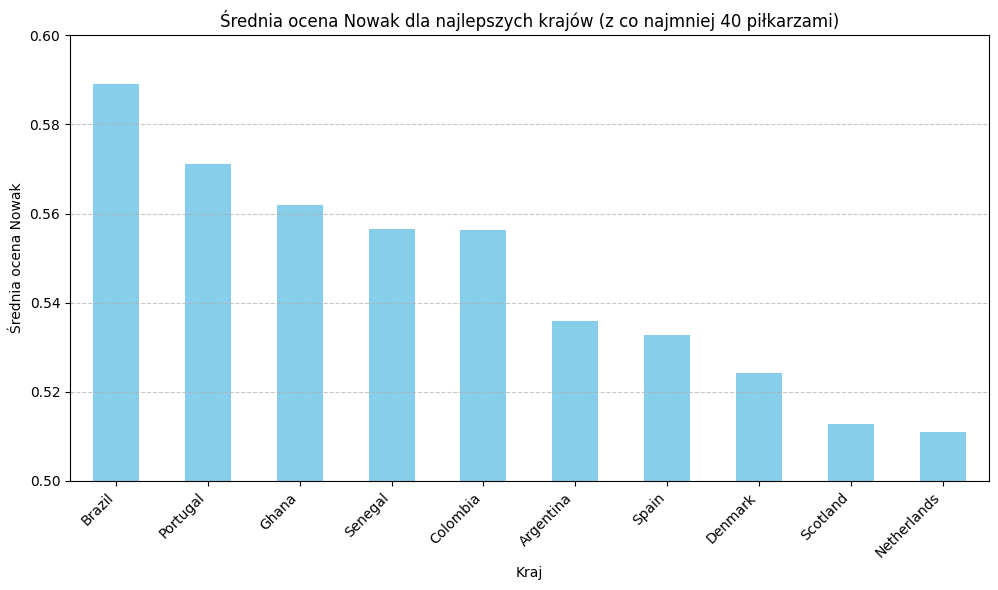

In [52]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['Nowak Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena Nowak')
plt.title('Średnia ocena Nowak dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.5, 0.6)

plt.show()

## Porównanie metod
### 1. Normalizacja wyników

In [53]:
normalized_scores = data[['age', 'height', 'country', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
columns_to_normalize = ['TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']
normalized_scores.loc[:, columns_to_normalize] = (normalized_scores[columns_to_normalize] - normalized_scores[columns_to_normalize].min()) / (normalized_scores[columns_to_normalize].max() - normalized_scores[columns_to_normalize].min())

### 2. Wyniki w zależności od wieku piłkarzy

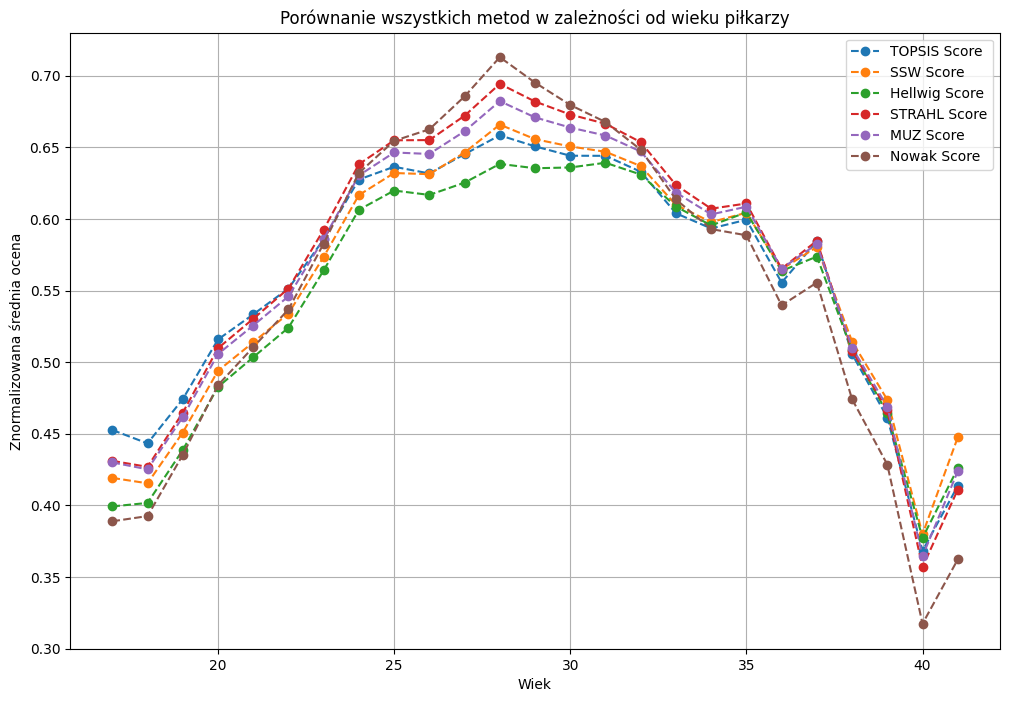

In [54]:
average_scores_by_age = normalized_scores[['age', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
average_scores_by_age = average_scores_by_age.groupby('age').mean()

plt.figure(figsize=(12, 8))

for column in average_scores_by_age.columns:
    plt.plot(average_scores_by_age.index, average_scores_by_age[column], marker='o', linestyle='--', label=column)

plt.ylim(0.3, 0.73)
plt.xlabel('Wiek')
plt.ylabel('Znormalizowana średnia ocena')
plt.title('Porównanie wszystkich metod w zależności od wieku piłkarzy')
plt.grid(True)
plt.legend()
plt.show()

### 3. Wyniki w zależności od kraju piłkarzy

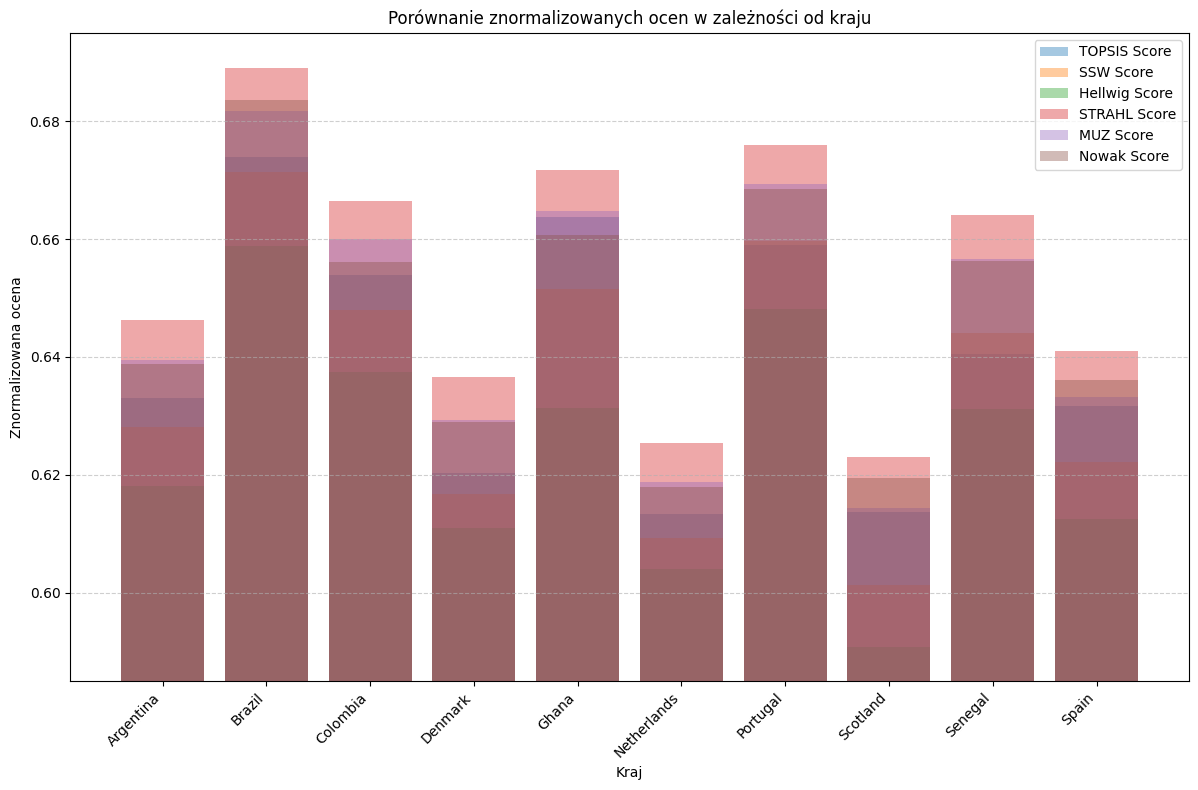

In [55]:
selected = normalized_scores[['country', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
players_count_by_country = selected['country'].value_counts()
top_countries = players_count_by_country[players_count_by_country >= 40].index
average_scores_by_country = selected[selected['country'].isin(top_countries)].groupby('country').mean()
top_countries = average_scores_by_country.nlargest(10, 'TOPSIS Score').index
top_countries_data = average_scores_by_country[average_scores_by_country.index.isin(top_countries)]

plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, column in enumerate(columns_to_normalize):
    plt.bar(top_countries_data.index, top_countries_data[column], color=colors[i], alpha=0.4, label=column)

plt.xlabel('Kraj')
plt.ylabel('Znormalizowana ocena')
plt.title('Porównanie znormalizowanych ocen w zależności od kraju')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.ylim(0.585, 0.695)

plt.show()

### 4. Wyniki w zależności od wzrostu piłkarzy

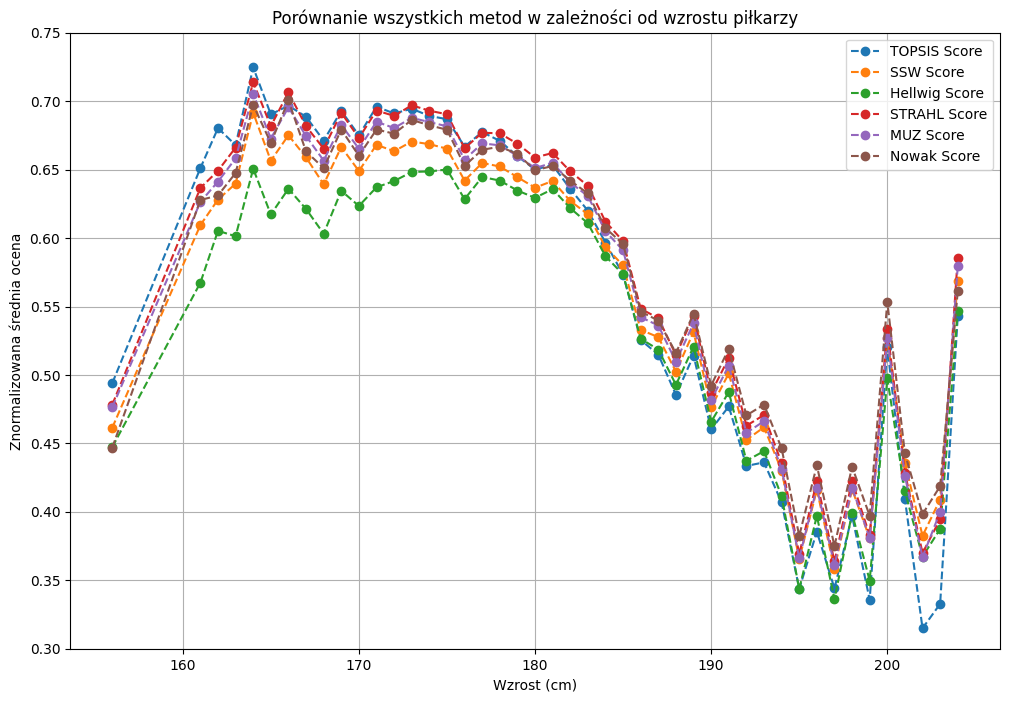

In [56]:
average_scores_by_height = normalized_scores[['height', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
average_scores_by_height = average_scores_by_height.groupby('height').mean()

plt.figure(figsize=(12, 8))

for column in average_scores_by_height.columns:
    plt.plot(average_scores_by_height.index, average_scores_by_height[column], marker='o', linestyle='--', label=column)

plt.ylim(0.3, 0.75)
plt.xlabel('Wzrost (cm)')
plt.ylabel('Znormalizowana średnia ocena')
plt.title('Porównanie wszystkich metod w zależności od wzrostu piłkarzy')
plt.grid(True)
plt.legend()
plt.show()

### 5a. Korelacja między metodami

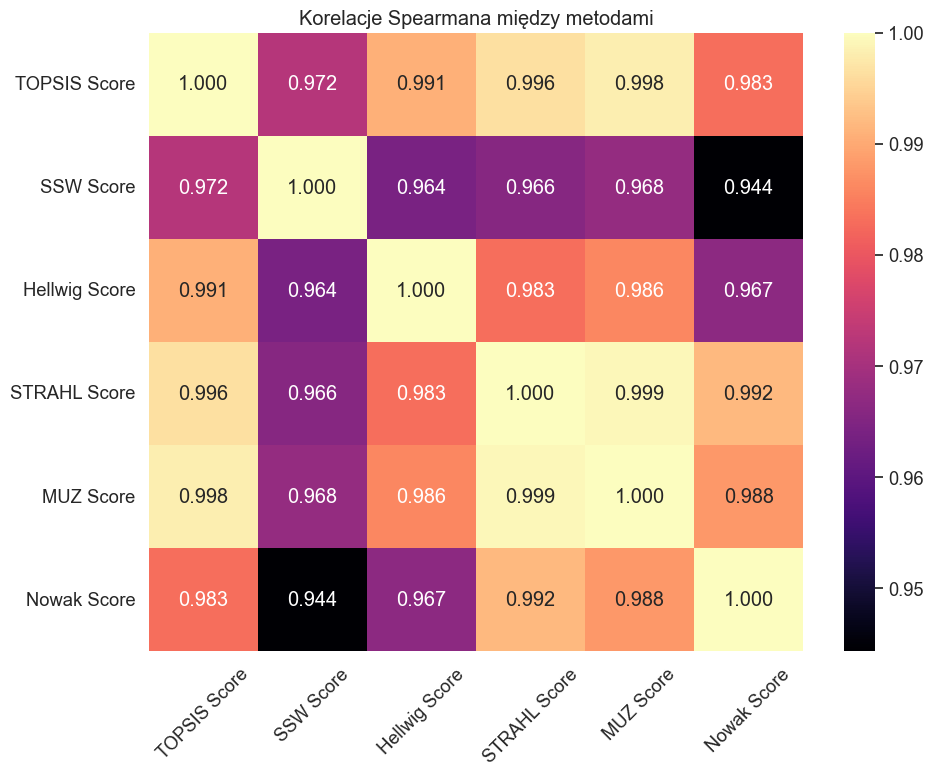

In [57]:
rankings = normalized_scores[['SSW Score','TOPSIS Score',  'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
corr, p_value = spearmanr(rankings, axis=0)
methods = ['TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="magma", xticklabels=methods, yticklabels=methods)
plt.title("Korelacje Spearmana między metodami")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 5b. Wnioski z korelacji

Z przeprowadzonego badania korelacji między metodami wynika, że wykorzystane metody wskazały niemal identyczne wyniki. Najbardziej odstające od siebie wskazały metody **SSW** oraz **metoda Nowaka**.

# Najlepsi piłkarze (suma znormalizowanych wyników wszystkich metod)

Postanowiliśmy dodać zagregowany wskaźnik, który będzie zawierał informację o sumie wyników z każdej z badanych metod. Te, które są brane pod uwagę to wszystkie, które zostały wykorzystane wcześniej: TOPSIS, SSW, Hellwig, Strahl, Muz, Nowak.
$$
wynik\_koncowy = \sum^n_0 z_i
$$
$z_i$ - znormalizowany wynik z $i$-tej metody<br>
$z_i = \frac{x_i - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$<br>
$n$ - liczba wykorzystanych metod $(n=6)$


In [58]:
final_scores = pd.DataFrame(data['player'])
final_scores['final'] = normalized_scores[['TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']].sum(axis=1)
final_scores = final_scores.sort_values(by='final', ascending=False)
data['final'] = final_scores['final']
sorted_data = data.sort_values(by='final', ascending=False)
selected_columns = sorted_data[['player', 'final']].head(15)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'final': 'Wynik końcowy'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik końcowy
0,1,Mohamed Salah,5.972116
1,2,Joshua Kimmich,5.835687
2,3,Renato Sanches,5.830041
3,4,Kylian Mbappé,5.809677
4,5,João Cancelo,5.798090
5,6,Sergi Darder,5.784843
6,7,Lautaro Martínez,5.748868
7,8,Ángel Correa,5.745786
8,9,Federico Valverde,5.745346
9,10,Kevin De Bruyne,5.716073


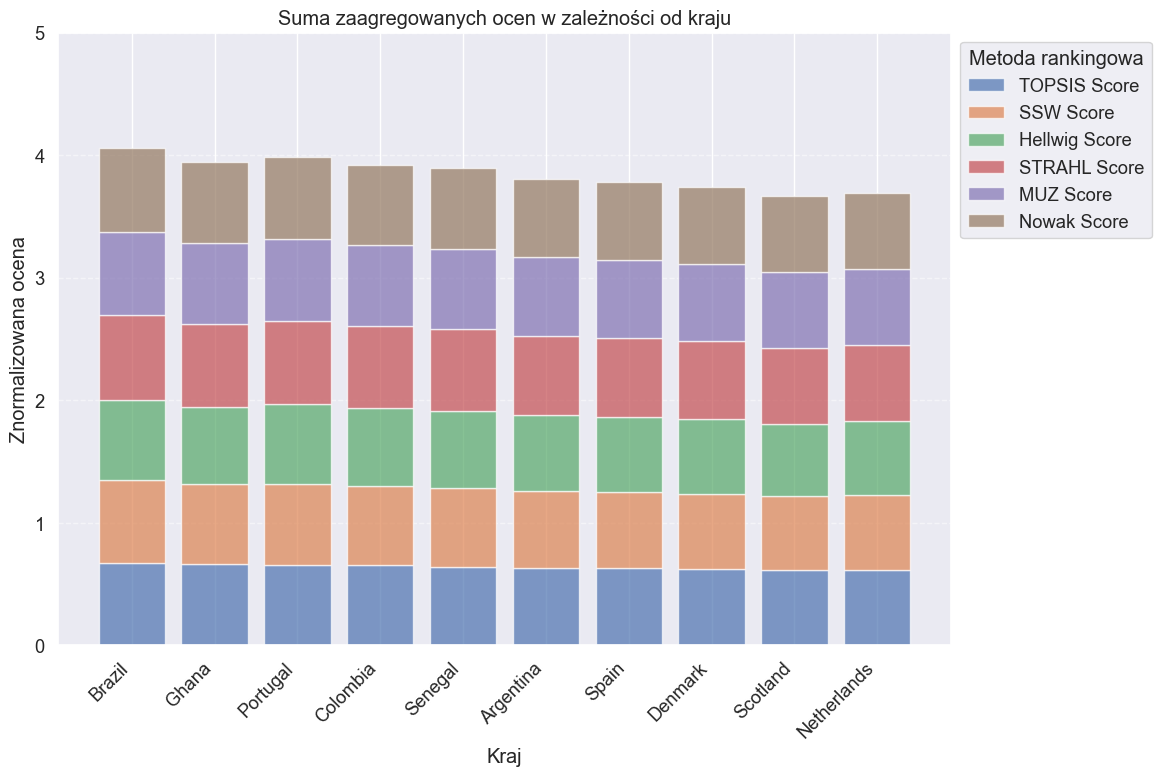

In [59]:
top_countries_data = average_scores_by_country.nlargest(10, 'TOPSIS Score')
countries = top_countries_data.index
methods = ['TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']

plt.figure(figsize=(12, 8))

bottom = np.zeros(len(countries))
for method in methods:
    scores = top_countries_data[method].values
    plt.bar(countries, scores, bottom=bottom, label=method, alpha=0.7)
    bottom += scores

plt.xlabel('Kraj')
plt.ylabel('Znormalizowana ocena')
plt.title('Suma zaagregowanych ocen w zależności od kraju')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metoda rankingowa', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 5)
plt.show()

# Wnioski końcowe

Według znormalizowanej sumy użytych przez nas metod najlepszym piłkarzem jest <b>Mohamed Salah</b>. Jest to spodziewany wynik, ponieważ często pojawiał się jako najlepszy piłkarz w użytych przez nas metodach. Oczywiście należy pamiętać, że statystyki używane do oceny piłkarzy pochodzą z gry komputerowej, która nie zawsze wiernie odzwierciedla rzeczywistość. Niemniej zaprezentowane metody dały adekwatne wyniki.

## Bibliografia
Ben Carter, When do footballers reach their peak? BBC News, 2014
- [Optymalny wiek dla piłkarza](https://www.bbc.com/news/magazine-28254123)
- [SSW](https://study.com/skill/learn/how-to-calculate-the-total-sum-of-squares-within-and-between-ssw-and-ssb-explanation.html)
- [TOPSIS](https://repozytorium.uwb.edu.pl/jspui/bitstream/11320/7542/1/Optimum_4_2018_D_Kacprzak_Przedzialowa_metoda_TOPSIS.pdf)